# Coursera Courses Dataset - Exploratory Data Analysis

This notebook performs comprehensive EDA on the Coursera courses dataset.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Data Loading

In [3]:
# Load the dataset
df = pd.read_csv('../data/courses.csv')
print(f"Shape: {df.shape}")

Shape: (5411, 8)


## 2. Initial Data Exploration

In [4]:
# Display first few rows
df.head()

,url,name,category,what_you_learn,skills,language,instructors,content
0,https://www.coursera.org/learn/-network-security,Network Security,Information Technology,NaN,"Computer Networking, Network Planning And Desi...",English,['~31081695'],Welcome to course 4 of 5 of this Specializatio...
1,https://www.coursera.org/learn/-security-princ...,Security Principles,Information Technology,NaN,"Cyber Security Policies, Data Integrity, Cyber...",English,['~31081695'],Welcome to course 1 of 5 of this Specializatio...
2,https://www.coursera.org/learn/21st-century-en...,21st Century Energy Transition: how do we make...,Physical Science And Engineering,Understand the complexity of systems supplying...,"Electric Power Systems, Environmental Policy, ...",English,['brad-hayes'],NOTE: “21 st Century Energy Transition – How d...
3,https://www.coursera.org/learn/360-vr-video-pr...,VR and 360 Video Production,Arts And Humanities,NaN,"Virtual Reality, Videography, Media Production...",English,['googlearvr'],Welcome to the Google AR & VR Virtual Reality ...
4,https://www.coursera.org/learn/3d-anatomy-phys...,Foundations of Human Anatomy and Physiology,Health,Learners will understand how body structure su...,"Vital Signs, Basic Patient Care, Anatomy, Heal...",English,"['~167016541', '~166856472', '~166856442', '~1...",This course provides a foundational understand...


In [5]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             5411 non-null   object
 1   name            5411 non-null   object
 2   category        5411 non-null   object
 3   what_you_learn  3005 non-null   object
 4   skills          5411 non-null   object
 5   language        5411 non-null   object
 6   instructors     5411 non-null   object
 7   content         5411 non-null   object
dtypes: object(8)
memory usage: 338.3+ KB


In [6]:
# Statistical summary for numerical columns
df.describe()

,url,name,category,what_you_learn,skills,language,instructors,content
count,5411,5411,5411,3005,5411,5411,5411,5411
unique,5411,5370,11,2979,5408,1,2593,5380
top,https://www.coursera.org/learn/zn-and-ni-based...,Introduction to Psychology,Health,The curriculum covers foundational concepts an...,"Instrumental Music, Music Theory, Music, Music...",English,['~158375127'],Digital Signal Processing is the branch of eng...
freq,1,4,774,3,2,5411,229,3


## 3. Missing Values Analysis

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
print("Missing Values Summary:")
print(missing_df)

Missing Values Summary:
                Missing Values  Percentage
what_you_learn            2406   44.464979


## 4. Category Analysis

In [8]:
# Course distribution by category
category_counts = df['category'].value_counts()
print("Number of courses per category:")
print(category_counts)
print(f"\nTotal unique categories: {df['category'].nunique()}")

Number of courses per category:
category
Health                              774
Physical Science And Engineering    746
Data Science                        660
Information Technology              655
Computer Science                    629
Business                            548
Social Sciences                     507
Arts And Humanities                 423
Personal Development                232
Language Learning                   171
Math And Logic                       66
Name: count, dtype: int64

Total unique categories: 11


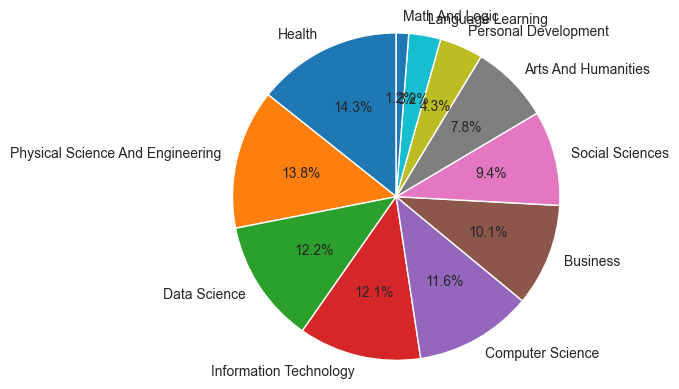

In [9]:
# Category distribution - Pie chart (top 10)
plt.figure(figsize=(6, 4))
top_categories = df['category'].value_counts()
plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 6. Skills Analysis

In [10]:
# Extract all skills from the dataset
all_skills = []
for skills in df['skills'].dropna():
    skill_list = [skill.strip() for skill in skills.split(',')]
    all_skills.extend(skill_list)

skills_series = pd.Series(all_skills)
top_skills = skills_series.value_counts().head(20)

print("Top 20 Most Common Skills:")
print(top_skills)

Top 20 Most Common Skills:
Data Analysis                    415
Artificial Intelligence          327
Generative AI                    327
Research                         305
Cultural Diversity               304
Communication                    249
Machine Learning                 248
Responsible AI                   242
Mathematical Modeling            236
Case Studies                     236
Sustainable Development          227
Governance                       226
Innovation                       222
Economics                        214
Data Ethics                      211
Public Health                    208
Prompt Engineering               196
Python Programming               195
Ethical Standards And Conduct    192
Storytelling                     191
Name: count, dtype: int64


In [11]:
# Count unique skills
unique_skills = len(set(all_skills))
total_skills = len(all_skills)

print(f"Total unique skills: {unique_skills}")
print(f"Total skill mentions: {total_skills}")
print(f"Average mentions per unique skill: {total_skills / unique_skills:.2f}")

Total unique skills: 2448
Total skill mentions: 63732
Average mentions per unique skill: 26.03


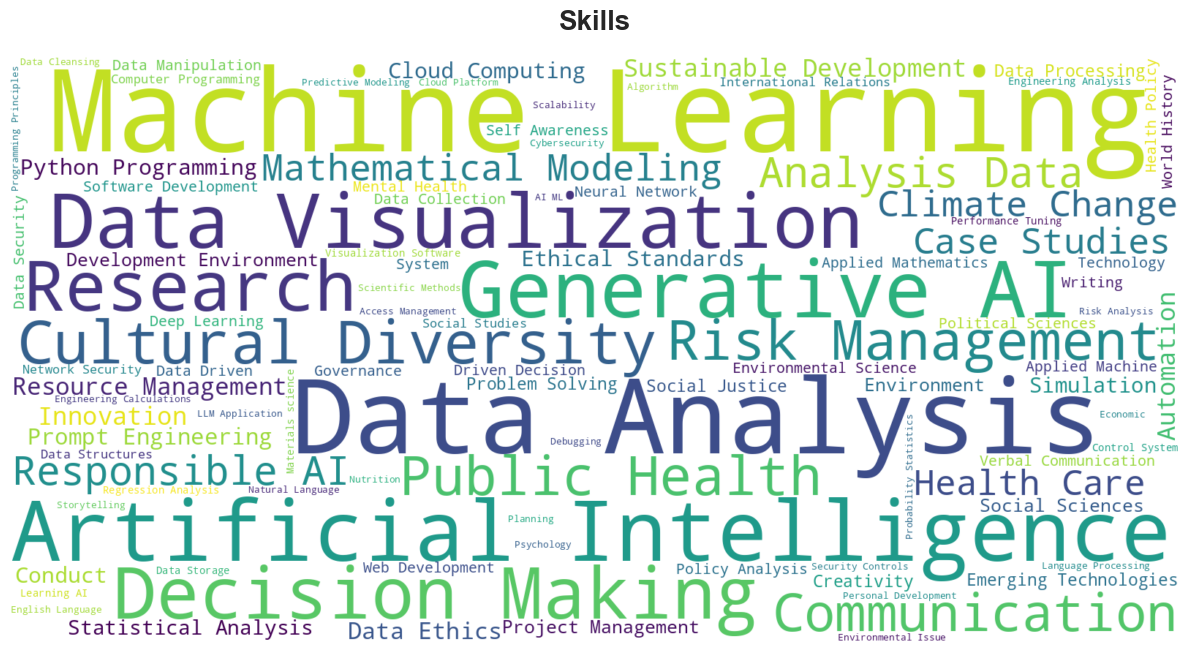

In [12]:
# Word cloud for skills
plt.figure(figsize=(12, 7))
skills_text = ' '.join(all_skills)
wordcloud = WordCloud(width=1600, height=800, background_color='white', 
                      colormap='viridis', max_words=100, random_state=3).generate(skills_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 7. Course Name Analysis

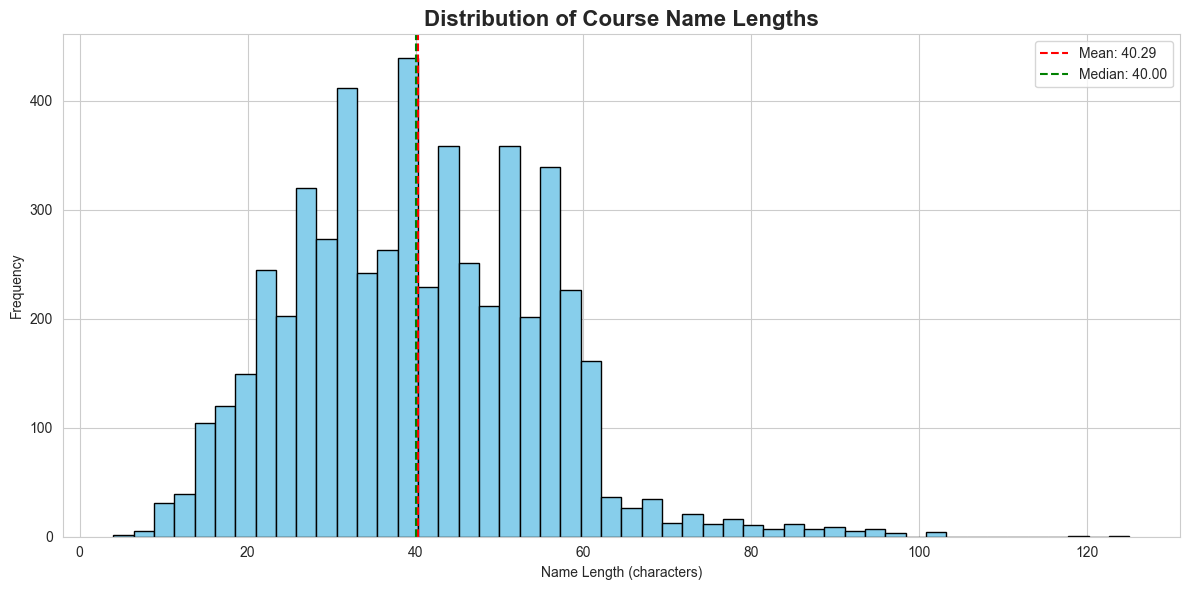

In [13]:
df['name_length'] = df['name'].str.len()
# print(df['name_length'].describe())

# Visualize name length distribution
plt.figure(figsize=(12, 6))
plt.hist(df['name_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Course Name Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Name Length (characters)')
plt.ylabel('Frequency')
plt.axvline(df['name_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["name_length"].mean():.2f}')
plt.axvline(df['name_length'].median(), color='green', linestyle='--', label=f'Median: {df["name_length"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

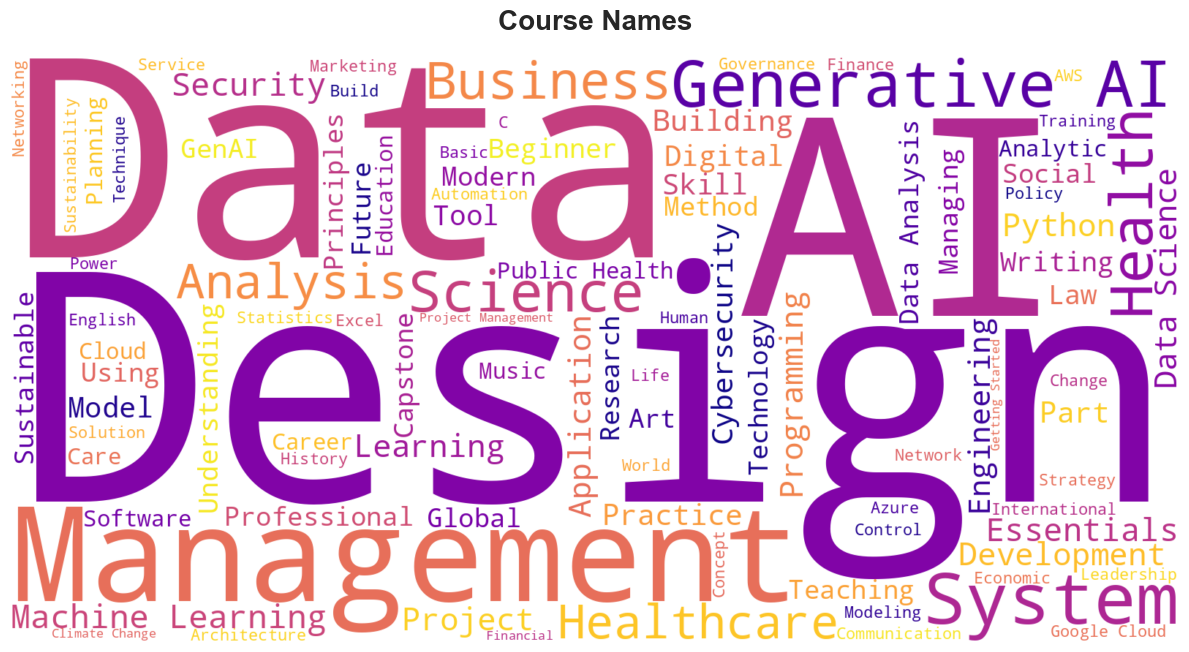

In [14]:
# Word cloud for course names
exclude_words = set(['course', 'introduction', 'learn', 'basics', 'fundamentals', 'complete', 'guide', 'foundation', 'foundations', 'advanced', 'essential'])
names_filtered = df['name'].dropna().apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in exclude_words]))
plt.figure(figsize=(12, 7))
names_text = ' '.join(names_filtered)
wordcloud = WordCloud(width=1600, height=800, background_color='white', 
                      colormap='plasma', max_words=100, random_state=3).generate(names_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Course Names', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 8. Content Length Analysis

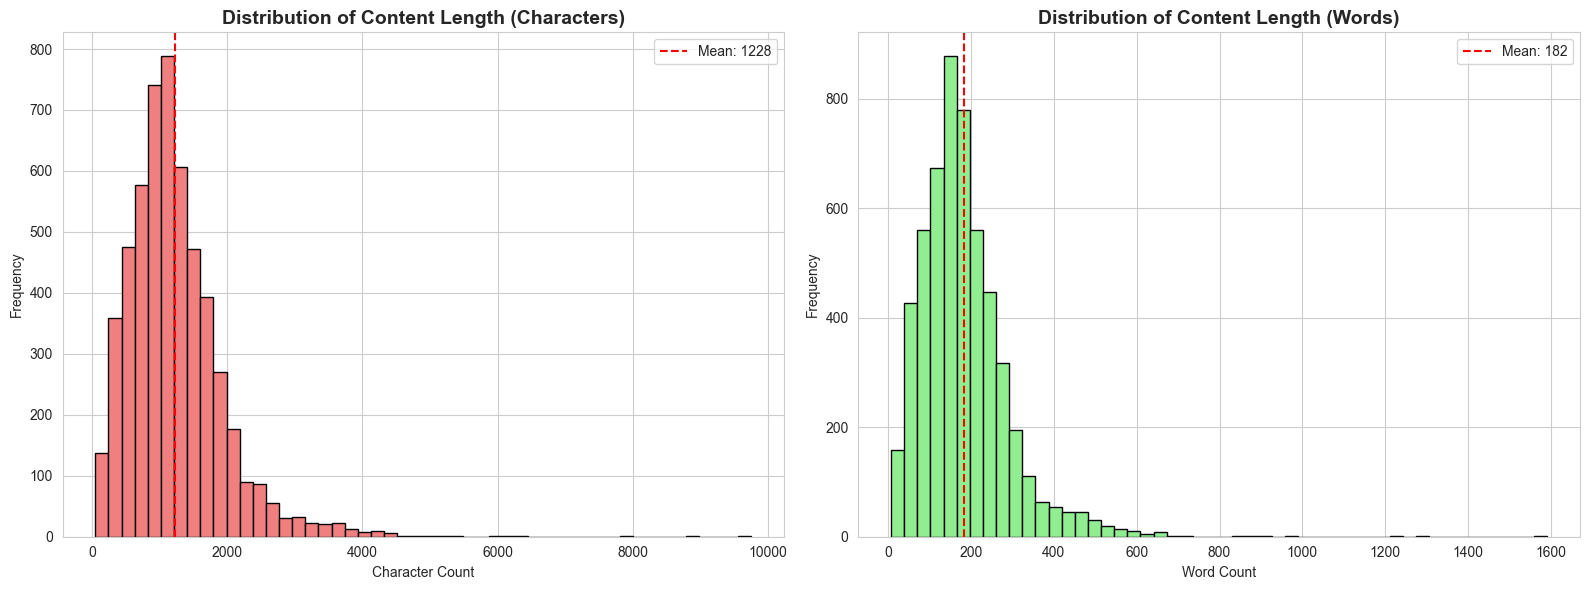

In [15]:
# Feature engineering - add content length features
df['content_length'] = df['content'].str.len()
df['content_word_count'] = df['content'].str.split().str.len()

# Visualize content length distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Character length distribution
axes[0].hist(df['content_length'], bins=50, color='lightcoral', edgecolor='black')
axes[0].set_title('Distribution of Content Length (Characters)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['content_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["content_length"].mean():.0f}')
axes[0].legend()

# Word count distribution
axes[1].hist(df['content_word_count'], bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Content Length (Words)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df['content_word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["content_word_count"].mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

In [18]:
print(df.iloc[0]['content'])

Welcome to course 4 of 5 of this Specialization, Network Security.In this course, we will look at computer networking and securing the network. In today’s world, the internet connects nearly everyone and everything, and this is accomplished through networking. While most see computer networking as a positive, criminals routinely use the internet, and the networking protocols themselves, as weapons and tools to exploit vulnerabilities and for this reason we must do our best to secure the network. We will review the basic components of a network, threats and attacks to the network, and learn how to protect them from attackers. Network security itself can be a specialty career within cybersecurity; however, all information security professionals need to understand how networks operate and are exploited to better secure them. 

After completing this chapter, the participant will be able to: 

Explain the concepts of network security. 

- Recognize common networking terms and models. 
- Ide

## 9. Instructor Analysis

In [104]:
# Instructor analysis
import ast

# Extract all instructors
all_instructors = []
instructor_counts = []

for instructors in df['instructors'].dropna():
    try:
        instructor_list = ast.literal_eval(instructors)
        all_instructors.extend(instructor_list)
        instructor_counts.append(len(instructor_list))
    except:
        pass

print(f"Total number of instructors: {len(set(all_instructors))}")
print(f"Average instructors per course: {np.mean(instructor_counts):.2f}")
print(f"Max instructors for a course: {max(instructor_counts) if instructor_counts else 0}")

Total number of instructors: 4033
Average instructors per course: 1.59
Max instructors for a course: 35


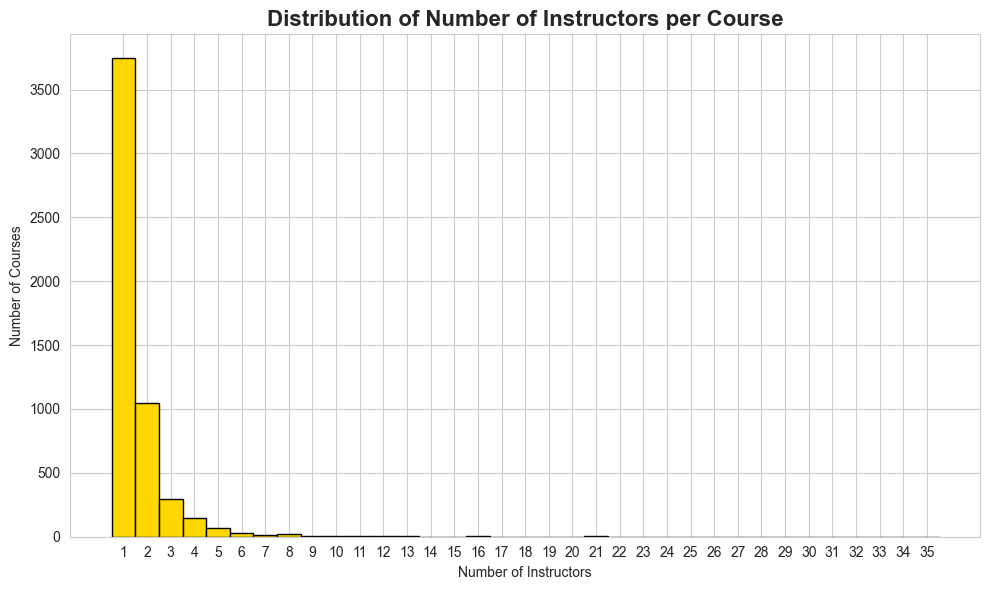

In [105]:
# Visualize instructor count distribution
plt.figure(figsize=(10, 6))
plt.hist(instructor_counts, bins=range(1, max(instructor_counts)+2), color='gold', edgecolor='black', align='left')
plt.title('Distribution of Number of Instructors per Course', fontsize=16, fontweight='bold')
plt.xlabel('Number of Instructors')
plt.ylabel('Number of Courses')
plt.xticks(range(1, max(instructor_counts)+1))
plt.tight_layout()
plt.show()

In [106]:
# Top instructors by number of courses
instructor_series = pd.Series(all_instructors)
top_instructors = instructor_series.value_counts().head(20)

print("Top 20 Instructors by Number of Courses:")
print(top_instructors)
print(f"\nInstructors teaching only 1 course: {(instructor_series.value_counts() == 1).sum()}")
print(f"Instructors teaching multiple courses: {(instructor_series.value_counts() > 1).sum()}")

Top 20 Instructors by Number of Courses:
~158375127                    229
microsoft                     134
~141793623                    133
google-cloud-training         125
~113266557                    112
~186501695                    102
google-career-certificates     74
ibm-skills-network             62
~187262598                     45
skillup                        42
board-infinity                 39
ravahuja                       39
~126164860                     29
~123403555                     28
~136048342                     28
juleswhite                     27
~148676017                     26
josephcutrone                  26
~28511493                      24
~30575670                      24
Name: count, dtype: int64

Instructors teaching only 1 course: 2850
Instructors teaching multiple courses: 1183


In [107]:
# Analyze categories taught by top instructors
instructor_categories = {}

for idx, row in df.iterrows():
    try:
        instructor_list = ast.literal_eval(row['instructors'])
        category = row['category']
        for instructor in instructor_list:
            if instructor not in instructor_categories:
                instructor_categories[instructor] = []
            instructor_categories[instructor].append(category)
    except:
        pass

# Get top 10 instructors and their categories
top_10_instructor_ids = instructor_series.value_counts().head(10).index

print("Top 10 Instructors and Their Teaching Categories:")
print("="*70)
for i, instructor_id in enumerate(top_10_instructor_ids, 1):
    categories = instructor_categories.get(instructor_id, [])
    unique_categories = set(categories)
    print(f"\n{i}. Instructor: {instructor_id}")
    print(f"   Total Courses: {len(categories)}")
    print(f"   Unique Categories: {len(unique_categories)}")
    print(f"   Categories: {', '.join(unique_categories)}")

Top 10 Instructors and Their Teaching Categories:

1. Instructor: ~158375127
   Total Courses: 229
   Unique Categories: 6
   Categories: Physical Science And Engineering, Information Technology, Arts And Humanities, Computer Science, Data Science, Business

2. Instructor: microsoft
   Total Courses: 134
   Unique Categories: 4
   Categories: Data Science, Information Technology, Computer Science, Business

3. Instructor: ~141793623
   Total Courses: 133
   Unique Categories: 9
   Categories: Physical Science And Engineering, Social Sciences, Health, Information Technology, Arts And Humanities, Data Science, Computer Science, Business, Personal Development

4. Instructor: google-cloud-training
   Total Courses: 125
   Unique Categories: 4
   Categories: Data Science, Information Technology, Computer Science, Business

5. Instructor: ~113266557
   Total Courses: 112
   Unique Categories: 2
   Categories: Physical Science And Engineering, Information Technology

6. Instructor: ~186501695

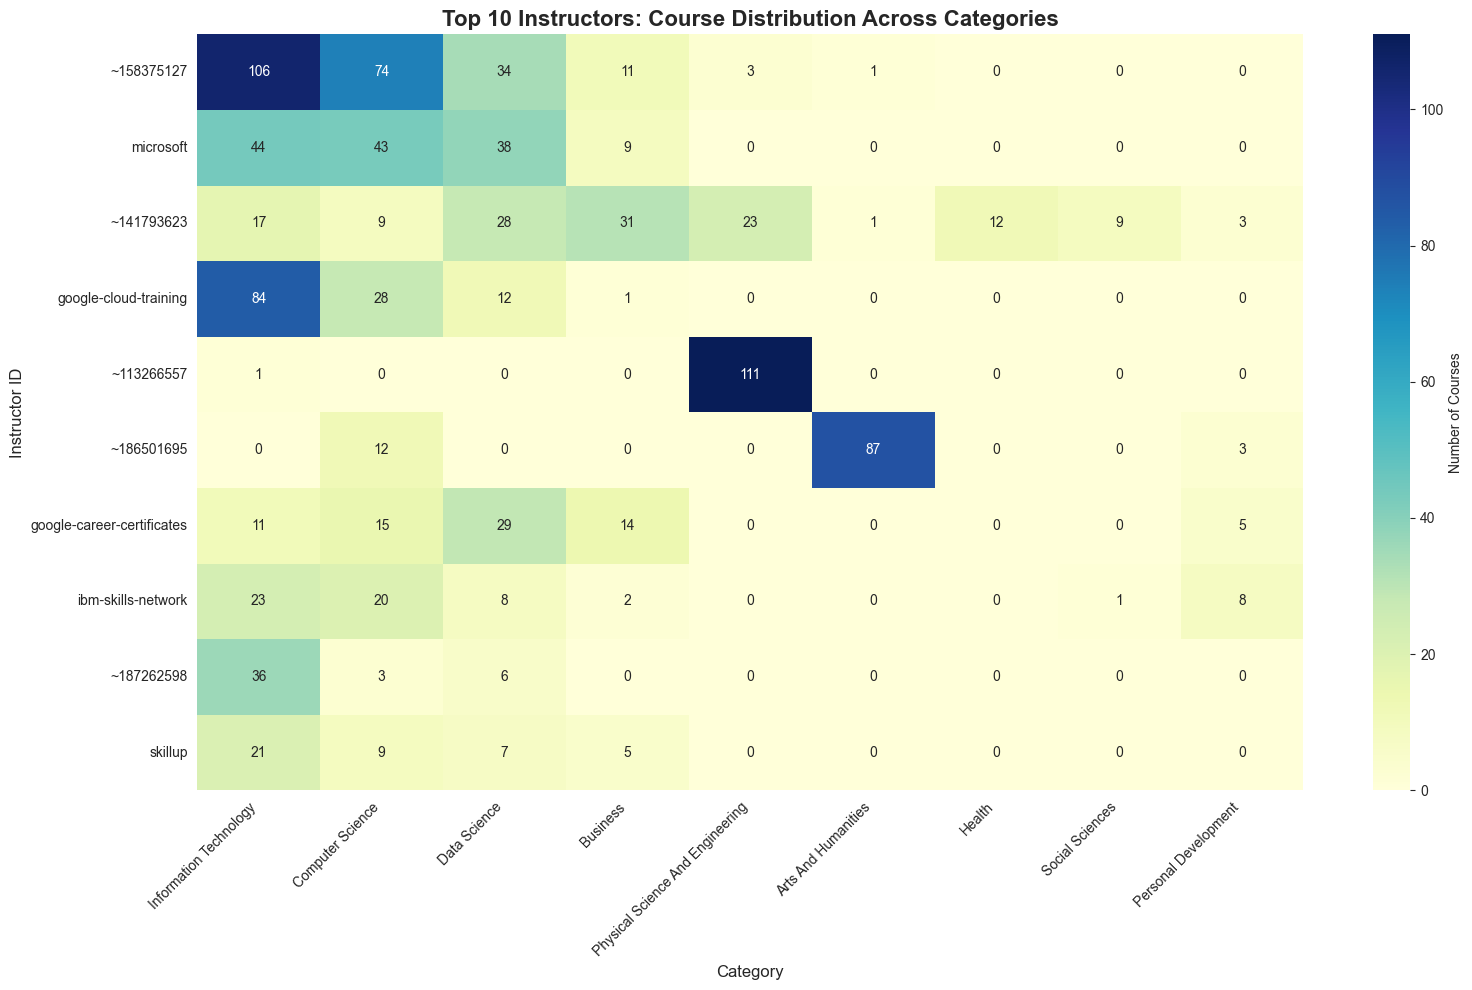

In [108]:
# Heatmap: Top instructors vs categories
# Create a matrix of top instructors and their course distribution across categories
top_instructor_category_matrix = []

for instructor_id in top_10_instructor_ids:
    categories = instructor_categories.get(instructor_id, [])
    category_counts = pd.Series(categories).value_counts()
    top_instructor_category_matrix.append(category_counts)

instructor_category_df = pd.DataFrame(top_instructor_category_matrix, index=top_10_instructor_ids).fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(instructor_category_df, annot=True, fmt='.0f', cmap='YlGnBu', 
            cbar_kws={'label': 'Number of Courses'})
plt.title('Top 10 Instructors: Course Distribution Across Categories', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Instructor ID', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 10. What You Learn Analysis

In [109]:
# Learning outcomes analysis
df['what_you_learn_length'] = df['what_you_learn'].str.len()
df['what_you_learn_filled'] = df['what_you_learn'].notna() & (df['what_you_learn'].str.strip() != '')

print(f"Courses with learning outcomes: {df['what_you_learn_filled'].sum()}")
print(f"Courses without learning outcomes: {(~df['what_you_learn_filled']).sum()}")
print(f"\nAverage length of learning outcomes: {df[df['what_you_learn_filled']]['what_you_learn_length'].mean():.2f} characters")

Courses with learning outcomes: 3005
Courses without learning outcomes: 2406

Average length of learning outcomes: 582.93 characters


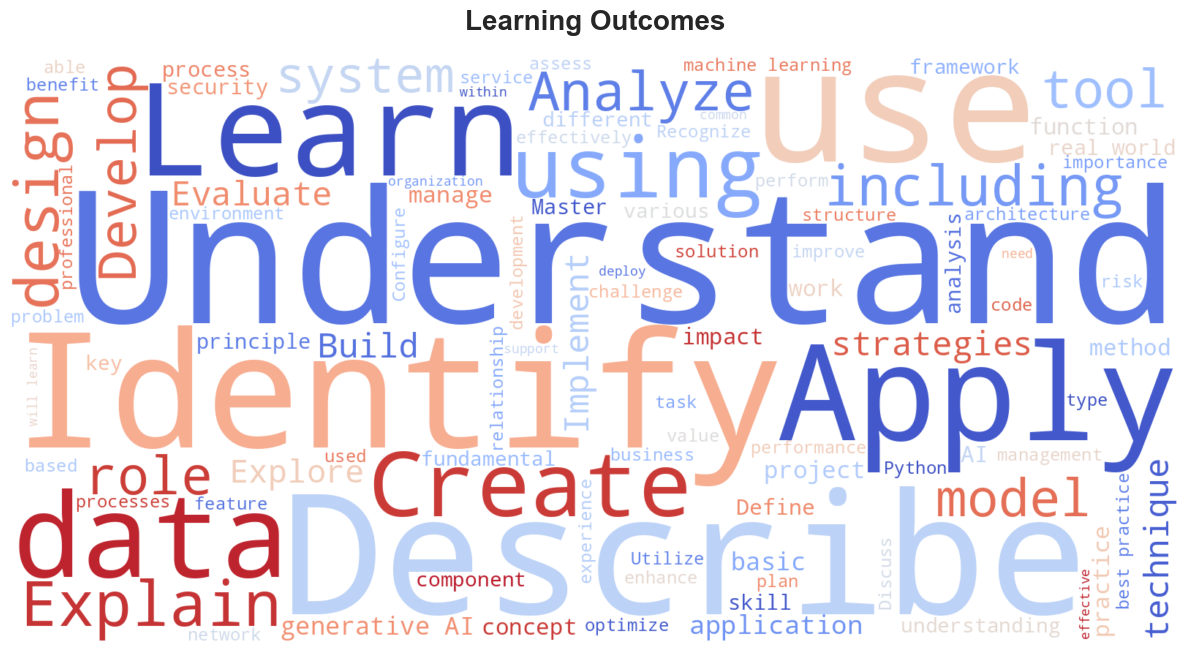

In [110]:
# Word cloud for learning outcomes
plt.figure(figsize=(12, 7))
learn_text = ' '.join(df['what_you_learn'].dropna())
if len(learn_text.strip()) > 0:
    wordcloud = WordCloud(width=1600, height=800, background_color='white', 
                          colormap='coolwarm', max_words=100, random_state=1).generate(learn_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Learning Outcomes', fontsize=20, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
else:
    print("No learning outcomes data available for word cloud")

## 13. Skills per Category Analysis

In [111]:
# Skills count per category
df['skills_count'] = df['skills'].str.split(',').str.len()

category_skills = df.groupby('category')['skills_count'].agg(['mean', 'median', 'max']).round(2)
category_skills = category_skills.sort_values('mean', ascending=False)

print("Skills Statistics by Category:")
print(category_skills)

Skills Statistics by Category:
                                   mean  median  max
category                                            
Business                          13.64    14.0   22
Information Technology            13.20    13.0   22
Data Science                      12.59    13.0   21
Social Sciences                   11.95    12.0   22
Health                            11.88    12.0   20
Computer Science                  11.72    11.0   20
Personal Development              11.25    11.0   20
Physical Science And Engineering  11.22    11.0   22
Math And Logic                     9.00     8.0   20
Arts And Humanities                8.64     8.0   22
Language Learning                  8.46     7.0   20


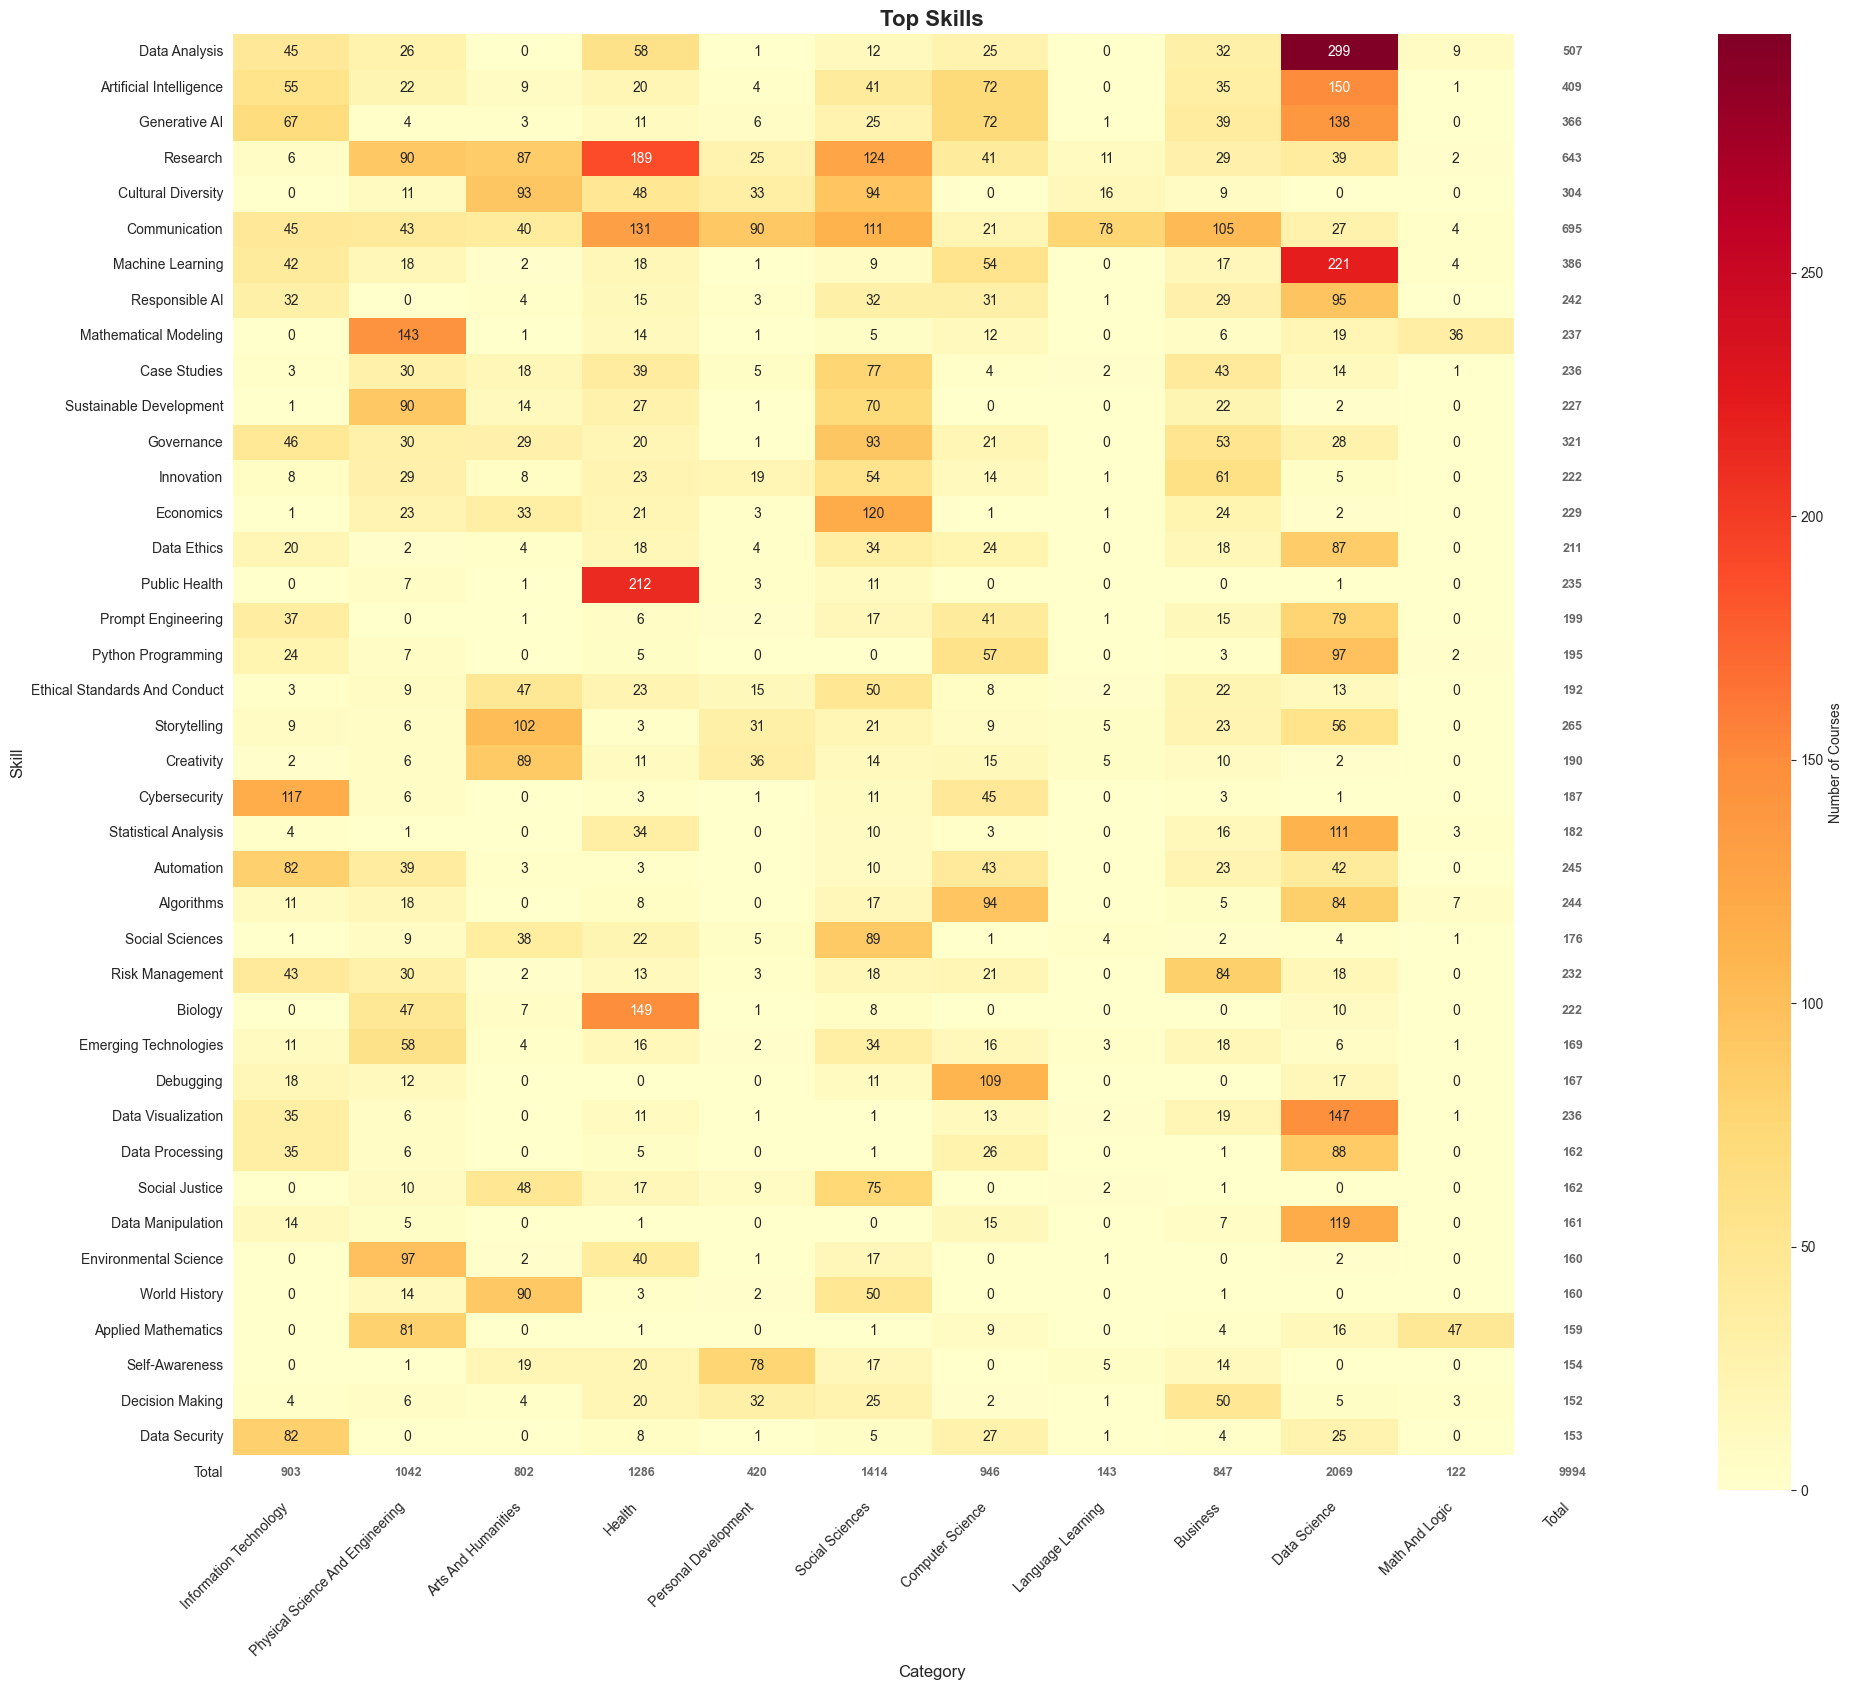

In [115]:
# Create a matrix of top 30 skills vs categories
top_n_skills = skills_series.value_counts().head(40).index

# Initialize matrix to store counts
skill_category_matrix = []

for skill in top_n_skills:
    skill_counts = []
    for category in df['category'].unique():
        # Count how many times this skill appears in this category
        category_courses = df[df['category'] == category]
        count = 0
        for skills_str in category_courses['skills'].dropna():
            if skill in skills_str:
                count += 1
        skill_counts.append(count)
    skill_category_matrix.append(skill_counts)

# Create DataFrame
skill_category_df = pd.DataFrame(skill_category_matrix, 
                                  index=top_n_skills, 
                                  columns=df['category'].unique())

# Add total row and column
skill_category_df['Total'] = skill_category_df.sum(axis=1)
skill_category_df.loc['Total'] = skill_category_df.sum(axis=0)

# Create mask for totals (True means no color)
mask = pd.DataFrame(False, index=skill_category_df.index, columns=skill_category_df.columns)
mask.loc['Total', :] = True
mask.loc[:, 'Total'] = True

# Heatmap: Top 30 Skills vs Categories with totals
fig, ax = plt.subplots(figsize=(20, 17))
sns.heatmap(skill_category_df, annot=True, fmt='g', cmap='YlOrRd', 
            mask=mask, cbar_kws={'label': 'Number of Courses'}, ax=ax)

# Cover total cells with white rectangles
num_categories = len(skill_category_df.columns)
num_skills = len(skill_category_df.index)

for i in range(num_skills):
    rect = plt.Rectangle((num_categories - 1, i), 1, 1, fill=True, 
                         facecolor='white', edgecolor='none')
    ax.add_patch(rect)

for j in range(num_categories):
    rect = plt.Rectangle((j, num_skills - 1), 1, 1, fill=True, 
                         facecolor='white', edgecolor='none')
    ax.add_patch(rect)

# Add total annotations
for i, skill in enumerate(skill_category_df.index):
    if skill == 'Total':
        for j, cat in enumerate(skill_category_df.columns):
            plt.text(j + 0.5, i + 0.5, f'{int(skill_category_df.loc[skill, cat])}',
                    ha='center', va='center', color='dimgray', fontweight='bold', fontsize=9)
    else:
        j = num_categories - 1
        plt.text(j + 0.5, i + 0.5, f'{int(skill_category_df.loc[skill, "Total"])}',
                ha='center', va='center', color='dimgray', fontweight='bold', fontsize=9)

plt.title('Top Skills', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 14. Duplicate Analysis

In [116]:
# Check for duplicate courses
duplicate_names = df[df.duplicated(subset=['name'], keep=False)]
duplicate_urls = df[df.duplicated(subset=['url'], keep=False)]

print(f"Duplicate course names: {len(duplicate_names)}")
print(f"Duplicate URLs: {len(duplicate_urls)}")
print(f"Total duplicates (exact rows): {df.duplicated().sum()}")

Duplicate course names: 77
Duplicate URLs: 0
Total duplicates (exact rows): 0


## 15. Correlation Analysis

### Category-to-Category Similarity Analysis

Analyzing how similar categories are based on their shared skill profiles.

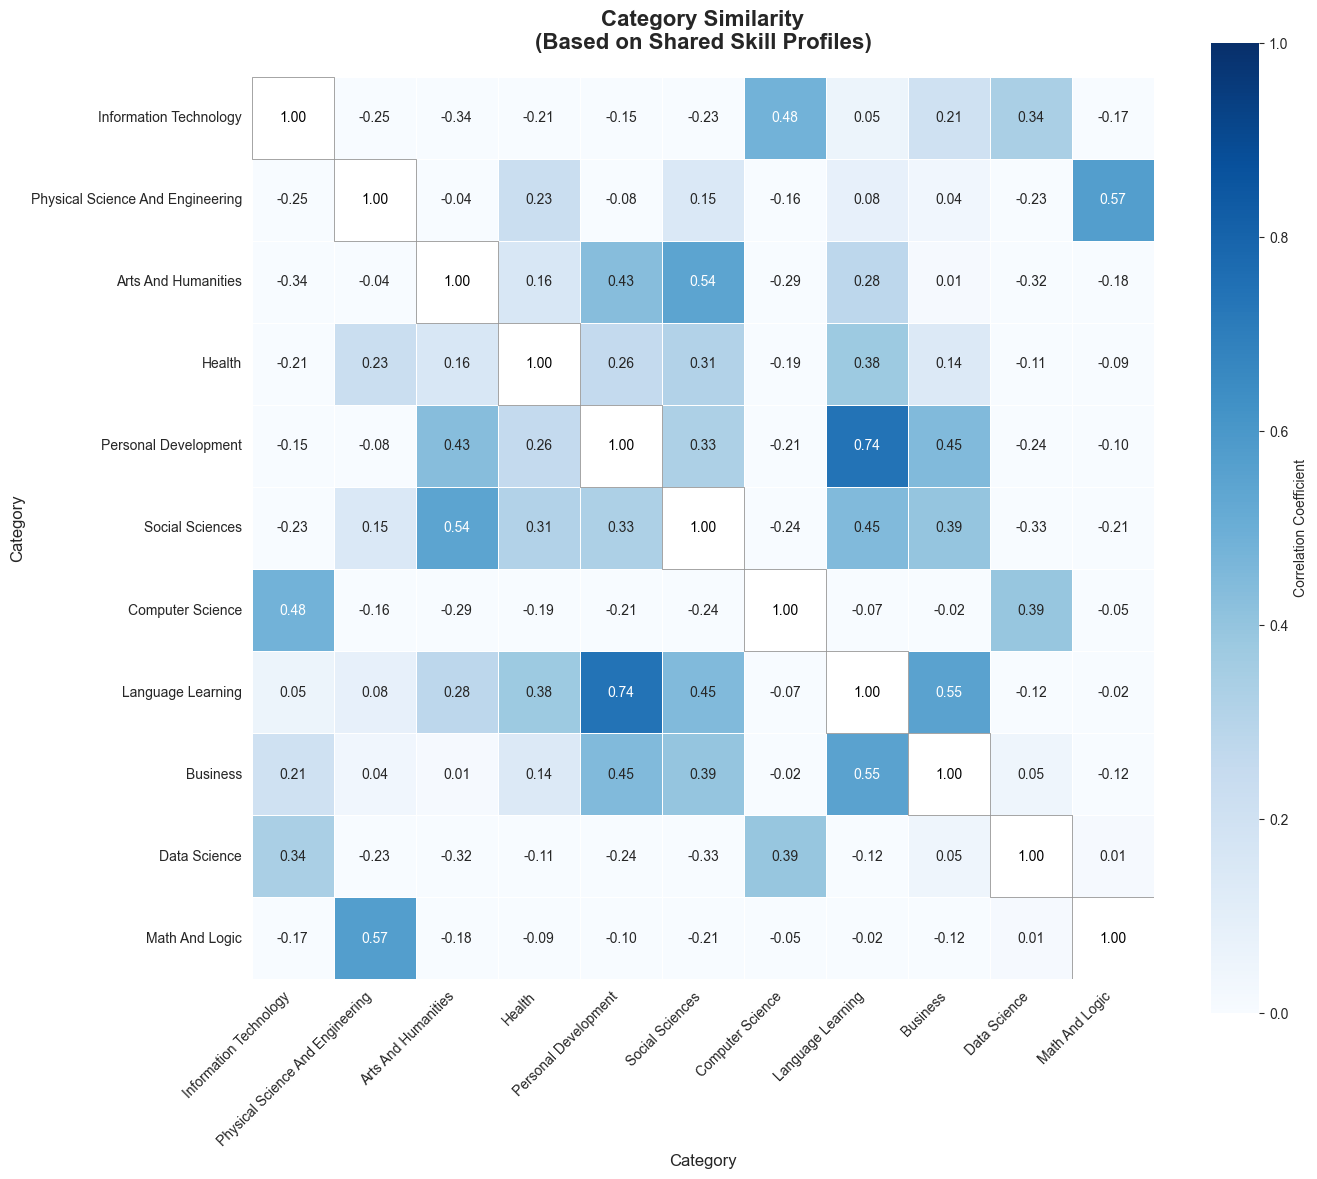

In [131]:
# Category-to-Category Correlation Matrix
# Remove 'Total' column for correlation calculation
skill_category_clean = skill_category_df.drop('Total', axis=1).drop('Total', axis=0)

# Transpose so categories are columns
category_skill_matrix = skill_category_clean.T

# Calculate correlation between categories (correlating across columns means correlating rows)
# We need to transpose first so categories become columns, then correlate
category_correlation = category_skill_matrix.T.corr()

# Find top similar pairs
corr_pairs = []
for i in range(len(category_correlation.columns)):
    for j in range(i+1, len(category_correlation.columns)):
        corr_pairs.append({
            'Category 1': category_correlation.columns[i],
            'Category 2': category_correlation.columns[j],
            'Correlation': category_correlation.iloc[i, j]
        })

corr_pairs_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)
# print(corr_pairs_df.head(10).to_string(index=False))

# Visualize Category-to-Category Correlation Heatmap
# Create a mask for the diagonal
mask_diagonal = np.eye(len(category_correlation), dtype=bool)

plt.figure(figsize=(14, 12))
sns.heatmap(category_correlation, annot=True, fmt='.2f', cmap='Blues', 
            mask=mask_diagonal, square=True, linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient'},
            vmin=0, vmax=1)

# Fill diagonal with white
for i in range(len(category_correlation)):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=True, facecolor='white', edgecolor='gray', linewidth=0.5))
    plt.text(i + 0.5, i + 0.5, '1.00', ha='center', va='center', color='black', fontsize=10)

plt.title('Category Similarity\n(Based on Shared Skill Profiles)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# print("\nInterpretation:")
# print("- Darker blue indicates categories with very similar skill profiles")
# print("- White/light blue indicates categories with different skill profiles")
# print("- Diagonal is white (category compared with itself)")

### Skill-to-Skill Co-occurrence Analysis

Analyzing which skills tend to appear together in the same courses.

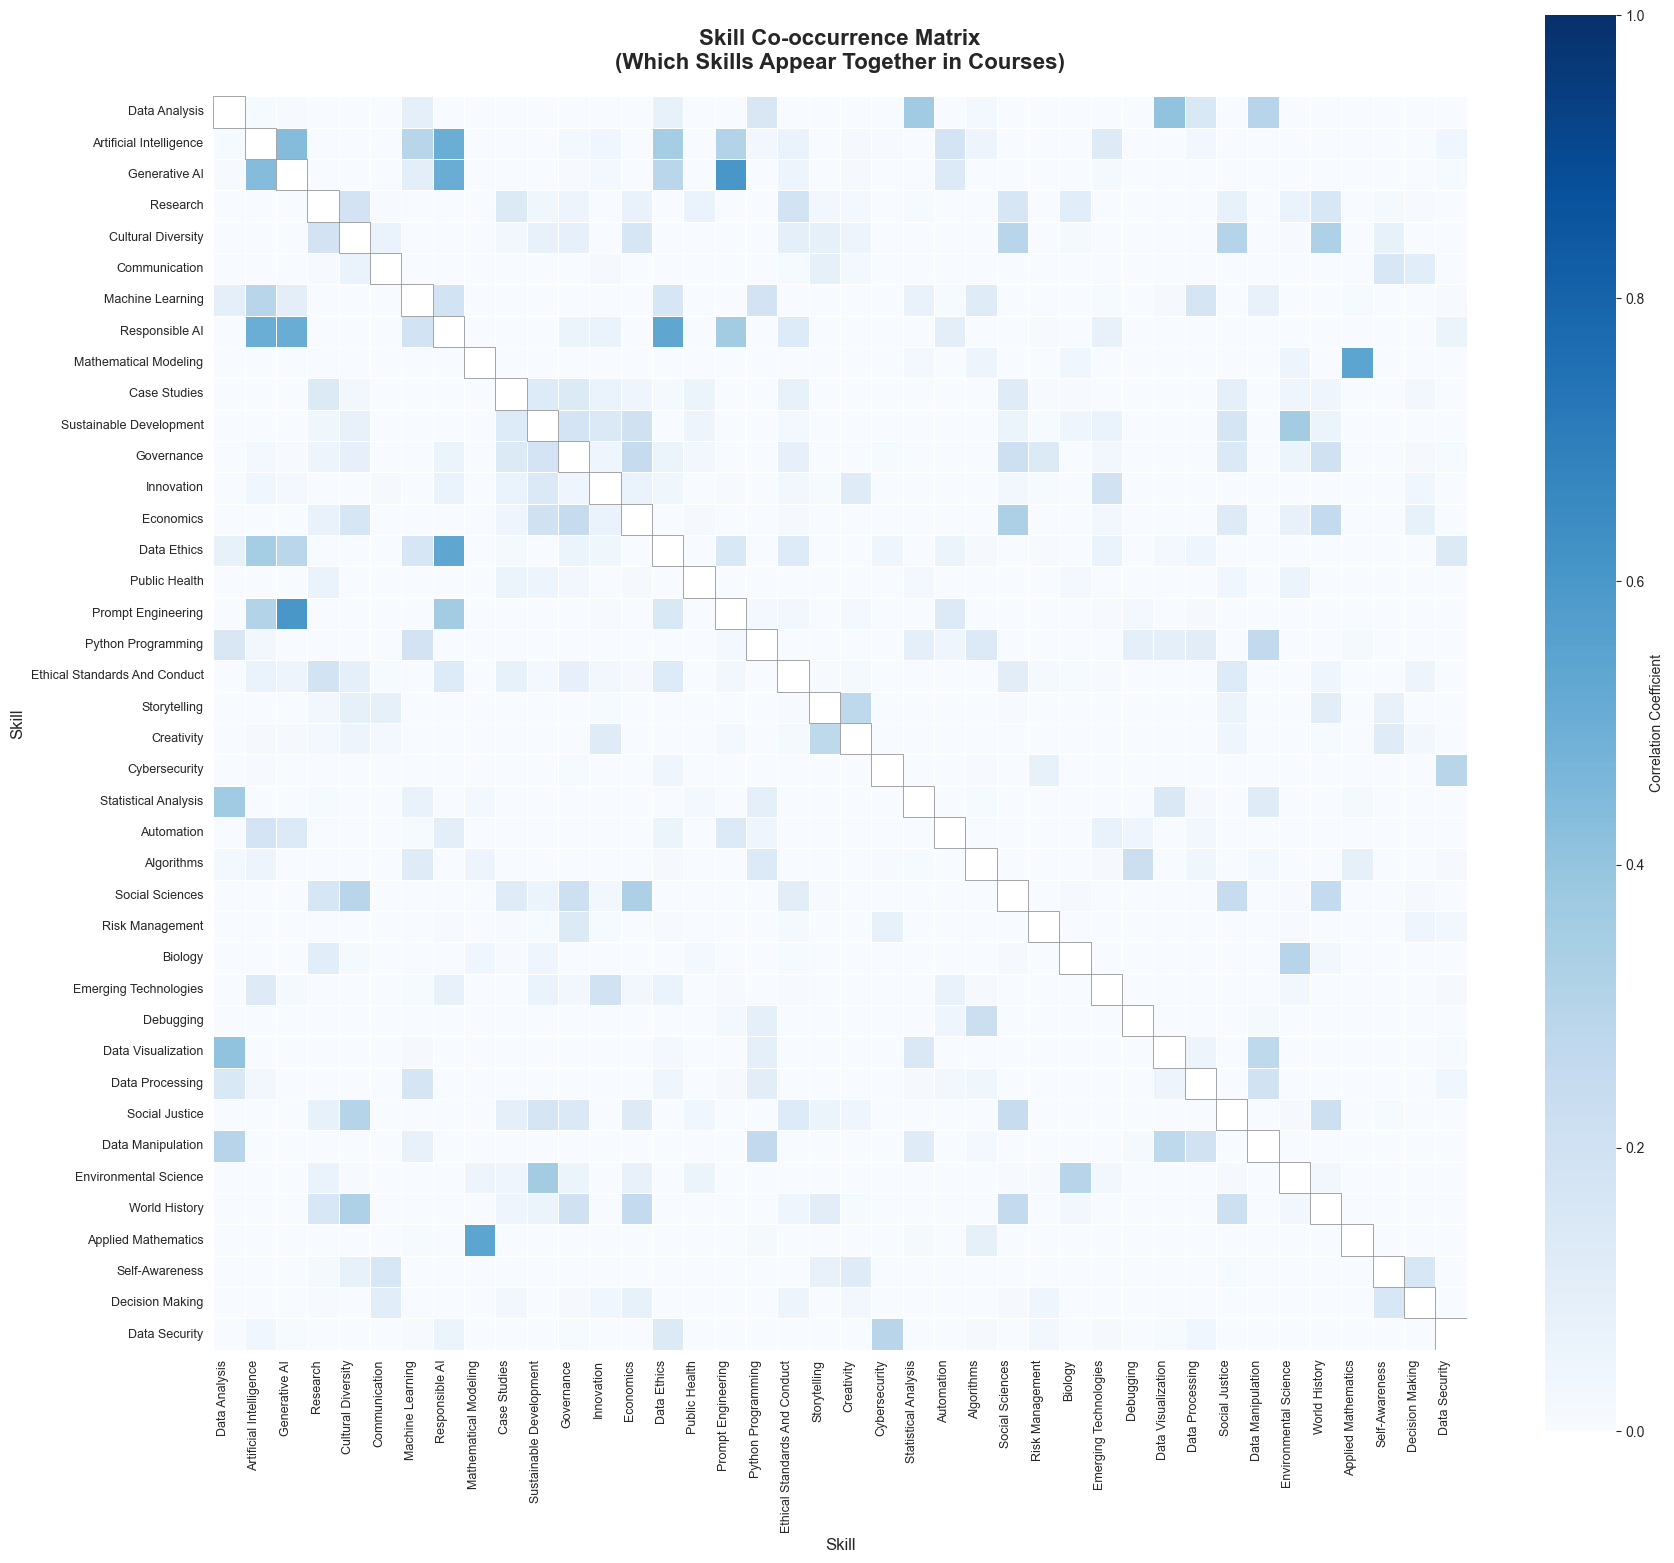

In [133]:
# Skill-to-Skill Co-occurrence Matrix
# Create a binary matrix: 1 if skill appears in course, 0 otherwise
top_n_skills_list = skills_series.value_counts().head(40).index.tolist()

# Build course-skill matrix
course_skill_matrix = []
for idx, row in df.iterrows():
    skills_in_course = []
    if pd.notna(row['skills']):
        course_skills = [skill.strip() for skill in row['skills'].split(',')]
        skills_in_course = [1 if skill in course_skills else 0 for skill in top_n_skills_list]
    else:
        skills_in_course = [0] * len(top_n_skills_list)
    course_skill_matrix.append(skills_in_course)

course_skill_df = pd.DataFrame(course_skill_matrix, columns=top_n_skills_list)

# Calculate correlation between skills (which skills co-occur)
skill_correlation = course_skill_df.corr()

# Find top co-occurring skill pairs
skill_pairs = []
for i in range(len(skill_correlation.columns)):
    for j in range(i+1, len(skill_correlation.columns)):
        if skill_correlation.iloc[i, j] > 0.3:  # Only pairs with correlation > 0.3
            skill_pairs.append({
                'Skill 1': skill_correlation.columns[i],
                'Skill 2': skill_correlation.columns[j],
                'Correlation': skill_correlation.iloc[i, j]
            })

skill_pairs_df = pd.DataFrame(skill_pairs).sort_values('Correlation', ascending=False)
# print(skill_pairs_df.head(15).to_string(index=False))

# Visualize Skill-to-Skill Correlation Heatmap
# Create a mask for the diagonal
mask_diagonal_skill = np.eye(len(skill_correlation), dtype=bool)

plt.figure(figsize=(18, 16))
sns.heatmap(skill_correlation, annot=False, cmap='Blues', 
            mask=mask_diagonal_skill, square=True, linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient'},
            vmin=0, vmax=1)

# Fill diagonal with white
for i in range(len(skill_correlation)):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=True, facecolor='white', edgecolor='gray', linewidth=0.5))

plt.title('Skill Co-occurrence Matrix\n(Which Skills Appear Together in Courses)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Skill', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

# print("\nInterpretation:")
# print("- Darker blue: skills that frequently appear together")
# print("- White/light blue: skills that rarely appear in the same courses")
# print("- Diagonal is white (skill compared with itself)")
# print("- Useful for skill recommendations: if a course has skill A, it likely has skill B")